In [5]:
from influxdb import DataFrameClient
import json
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

In [6]:
config = load_config()
influx_client = DataFrameClient(**get_influxdb_info(config), database='ChameleonSimulator')

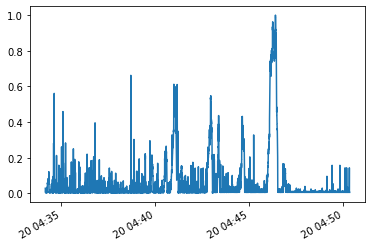

In [7]:
query_str = 'SELECT * FROM resource_pool'
df = influx_client.query(query_str)['resource_pool']
utl = 1-(df['ch-free']/(df['chi-inuse']+df['osg-inuse']+df['ch-free']))
utl.plot()
plt.show()

In [8]:
utl.mean(), utl.median(), utl.std()

(0.07026709204231836, 0.009478672985781977, 0.15852963592713099)

In [9]:
stop = df.iloc[-1].to_frame().T.index

In [10]:
query_str = 'SELECT * FROM osg_jobs'
osg = influx_client.query(query_str)['osg_jobs']
osg.reset_index(inplace=True)

In [11]:
times = [x for x in pd.to_datetime(osg['index']).to_list() if x < stop]
osg[osg['index'].isin(times)]

,index,completed,pending,running,terminated
0,2021-07-20 04:34:06.112527+00:00,0,0,0,0
1,2021-07-20 04:34:06.158065+00:00,0,0,0,0
2,2021-07-20 04:34:06.188649+00:00,0,0,0,0
3,2021-07-20 04:34:06.219136+00:00,0,0,0,0
4,2021-07-20 04:34:06.238677+00:00,0,0,0,0
...,...,...,...,...,...
22787,2021-07-20 04:50:19.929547+00:00,0,0,0,0
22788,2021-07-20 04:50:19.974493+00:00,0,0,0,0
22789,2021-07-20 04:50:20.013898+00:00,0,0,0,0
22790,2021-07-20 04:50:20.063464+00:00,0,0,0,0


In [13]:
import yaml

with open('config.yaml', 'r') as stream:
    try:
        print(yaml.safe_load(stream))
    except yaml.YAMLError as er:
        print(er)

{'simulation': {'scale_ratio': 100000, 'credential': {'username': 'chi-sim', 'password': 'chi-sim'}, 'enable_osg': False, 'enable_ml': False, 'enable_monitor': True}, 'framework': {'global_mgr': {'clean_run': True}, 'rsrc_mgr': {'host': '127.0.0.1'}, 'frontend': {'request_forecaster': {'window': 168, 'steps': 3, 'retrain': {'enabled': True, 'length': 30000}}}, 'databus': {'rabbitmq': '127.0.0.1'}, 'database': {'influxdb': '127.0.0.1', 'mongodb': '127.0.0.1'}}, 'workloads': {'machine_events': {'payload': '../datasets/machine_events/compute_haswell.csv', 'index_col': 0}, 'osg_jobs': {'payload': '../datasets/osg_jobs/osg_jobs.csv', 'index_col': 13}, 'chameleon_requests': {'payload': '../datasets/lease_info/compute_haswell.csv', 'index_col': 5}}}
